In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('heart.csv')
print(df)

     Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0             0   63    1   3       145   233    1        0      150      0   
1             1   37    1   2       130   250    0        1      187      0   
2             2   41    0   1       130   204    0        0      172      0   
3             3   56    1   1       120   236    0        1      178      0   
4             4   57    0   0       120   354    0        1      163      1   
..          ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
298         298   57    0   0       140   241    0        1      123      1   
299         299   45    1   3       110   264    0        1      132      0   
300         300   68    1   0       144   193    1        1      141      0   
301         301   57    1   0       130   131    0        1      115      1   
302         302   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  target  Heart Diseas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9B1A3F0C8>,
      dtype=object)

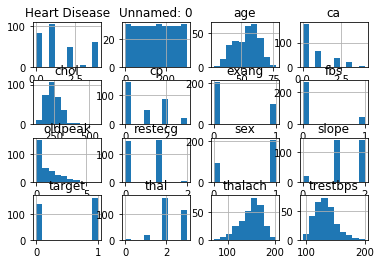

In [88]:
df.hist()

In [3]:
df.isna().sum()

Unnamed: 0       0
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
Heart Disease    0
dtype: int64

In [94]:
X = df.drop(['target'],axis=1)
y = df['target']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [96]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=3)

In [8]:
bag = BaggingClassifier(
    max_samples=.4)

In [9]:
bag.fit(X_train, y_train)

BaggingClassifier(max_samples=0.4)

In [10]:
bag.score(X_test, y_test)

0.989010989010989

In [11]:
bag.score(X_train, y_train)

1.0

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
m = RandomForestClassifier(n_estimators=20)

In [14]:
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [15]:
m.score(X_test, y_test)

1.0

In [16]:
m.score(X_train, y_train)

1.0

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
n = AdaBoostClassifier(base_estimator=None, n_estimators=200)

In [19]:
n.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [20]:
n.score(X_test, y_test)

0.989010989010989

In [21]:
n.score(X_train, y_train)

1.0

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [24]:
mm = VotingClassifier(
    estimators=[('lr', LogisticRegression()),
                ('rf', RandomForestClassifier()),
                ('dtc', DecisionTreeClassifier()),                
                ('svm', svm.SVC(kernel='linear')),
                ('gnb', GaussianNB())], 
    voting='hard')

In [25]:
mm.fit(X_train, y_train)

D:\annaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dtc', DecisionTreeClassifier()),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())])

In [26]:
mm.score(X_test, y_test)

1.0

In [27]:
mm.score(X_train, y_train)

1.0

In [99]:
yhat = mm.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yhat))

0.5494505494505495


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



D:\annaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0 41]
 [ 0 50]]


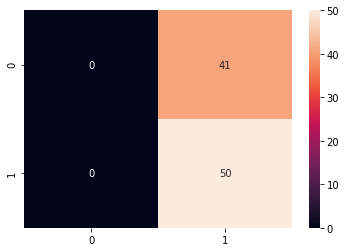

In [104]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yhat))
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [106]:
y_train.value_counts(normalize=True)

1    0.542453
0    0.457547
Name: target, dtype: float64

In [107]:
y_test.value_counts(normalize=True)

1    0.549451
0    0.450549
Name: target, dtype: float64

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
dt_model = DecisionTreeClassifier(random_state=10)

In [111]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [112]:
dt_model.score(X_train, y_train)

1.0

In [113]:
dt_model.score(X_test, y_test)

1.0

In [114]:
dt_model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [115]:
dt_model.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [116]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [117]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y_test, y_new)

1.0

In [120]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [121]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0


In [122]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [123]:
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train)


1.0

In [124]:
dt_model.score(X_test, y_test)


1.0

In [125]:
from sklearn import tree

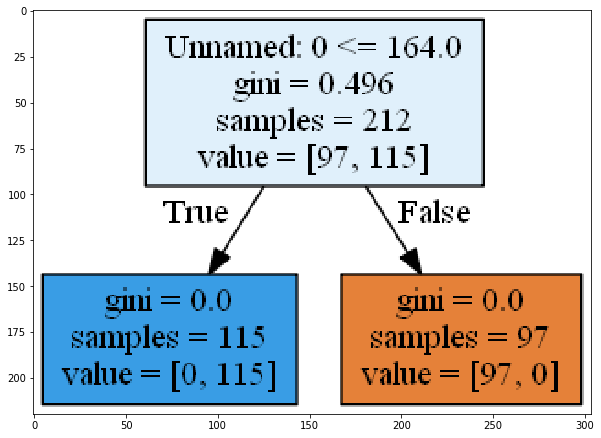

In [126]:
ecision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=4,filled=True)
!dot -Tpng tree.dot -o tree.png
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

In [127]:
obj = DecisionTreeClassifier(criterion="entropy")

In [128]:
other=[ 'age',  'sex','trestbps', 'restecg','trestbps', 'oldpeak', 'thalach' , 'exang','slope','Heart Disease']

y = df['target']
X = df[other]

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [132]:
obj = obj.fit(x_train,y_train)

[Text(997.9615384615383, 520.95, 'X[7] <= 0.5\nentropy = 0.996\nsamples = 227\nvalue = [105, 122]'),
 Text(536.5384615384615, 475.65000000000003, 'X[0] <= 56.5\nentropy = 0.883\nsamples = 156\nvalue = [47, 109]'),
 Text(300.46153846153845, 430.35, 'X[1] <= 0.5\nentropy = 0.613\nsamples = 86\nvalue = [13, 73]'),
 Text(257.53846153846155, 385.05, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(343.38461538461536, 385.05, 'X[6] <= 168.5\nentropy = 0.761\nsamples = 59\nvalue = [13, 46]'),
 Text(257.53846153846155, 339.75, 'X[0] <= 52.5\nentropy = 0.954\nsamples = 32\nvalue = [12, 20]'),
 Text(214.61538461538458, 294.45, 'X[5] <= 0.7\nentropy = 0.999\nsamples = 25\nvalue = [12, 13]'),
 Text(128.76923076923077, 249.14999999999998, 'X[9] <= 1.5\nentropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(85.84615384615384, 203.84999999999997, 'X[0] <= 44.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(42.92307692307692, 158.55, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(

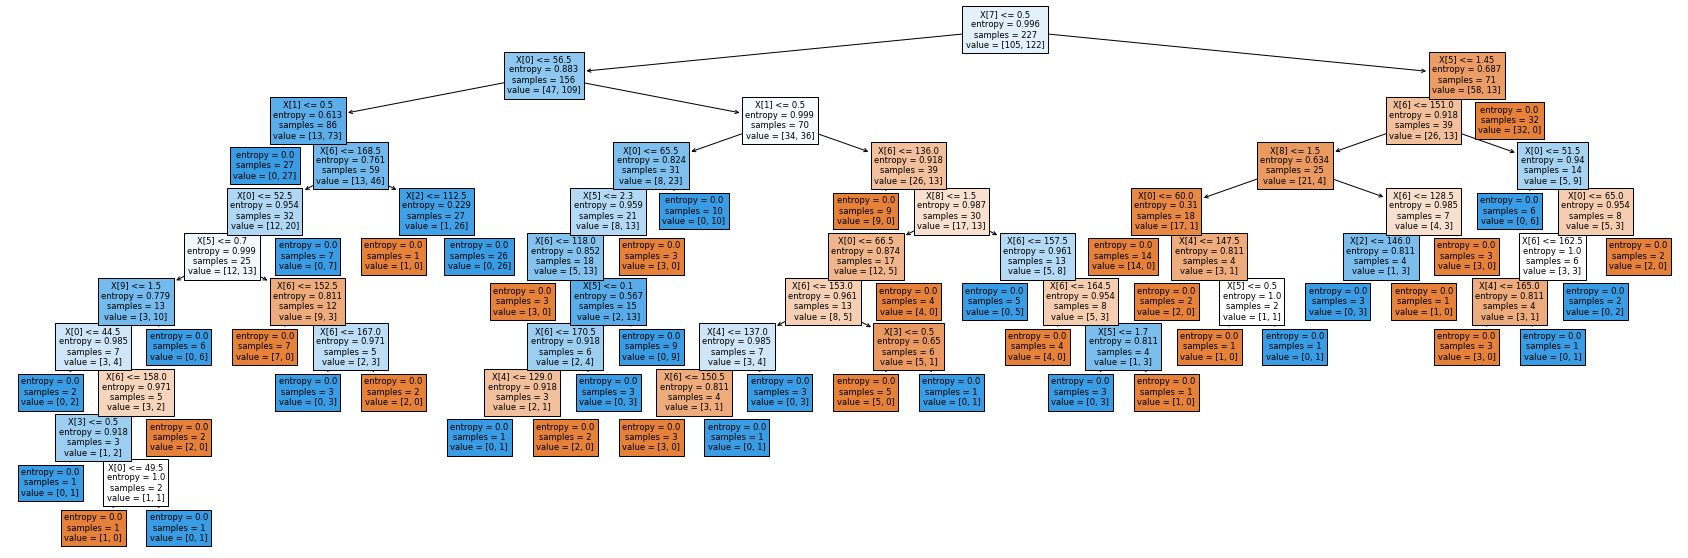

In [133]:
plt.figure(figsize = (30,10))
tree.plot_tree(obj, filled = True)

In [134]:
X = df.drop(['target'],axis=1)
y = df['target']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,shuffle=True, random_state=5)

In [136]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

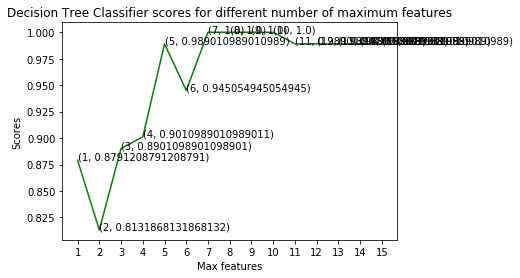

In [137]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

LogisticRegression(max_iter=500)

In [139]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [140]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,yhat)
cnf_matrix

array([[39,  2],
       [ 0, 50]], dtype=int64)

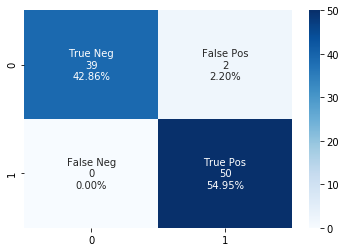

In [141]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cnf_matrix,fmt='', annot=labels,cmap='Blues')

In [142]:
tC= (sum(df['target'])/len(df['target'].index))*100
tC

54.45544554455446

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale= scaler.fit(X_train)

In [144]:
X_train= scale.transform(X_train)
X_test= scale.transform(X_test)

In [145]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,yhat)

In [146]:
score

0.978021978021978

In [147]:
TP = cnf_matrix[1,1]  
TN = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TP / float(TP+FN)


1.0

In [148]:
TN / float(TN+FP)

0.9512195121951219

In [149]:
print(FP/ float(TN+FP))
print (TP / float(TP+FP))
print (TN / float(TN+ FN))

0.04878048780487805
0.9615384615384616
1.0
